In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [7]:
zoo = pd.read_csv("Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [9]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [17]:
print(zoo.columns)


Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')


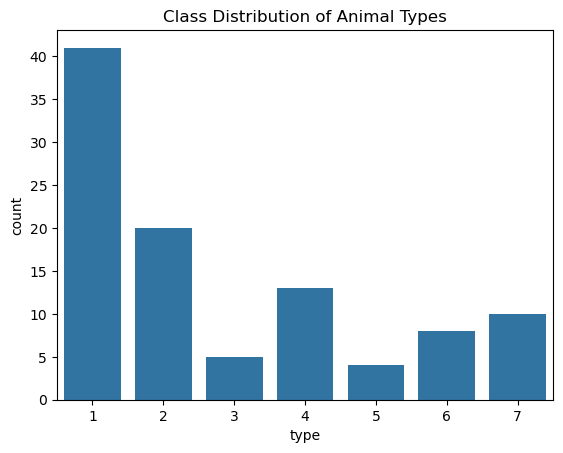

In [19]:
sns.countplot(x=zoo['type'])
plt.title("Class Distribution of Animal Types")
plt.show()


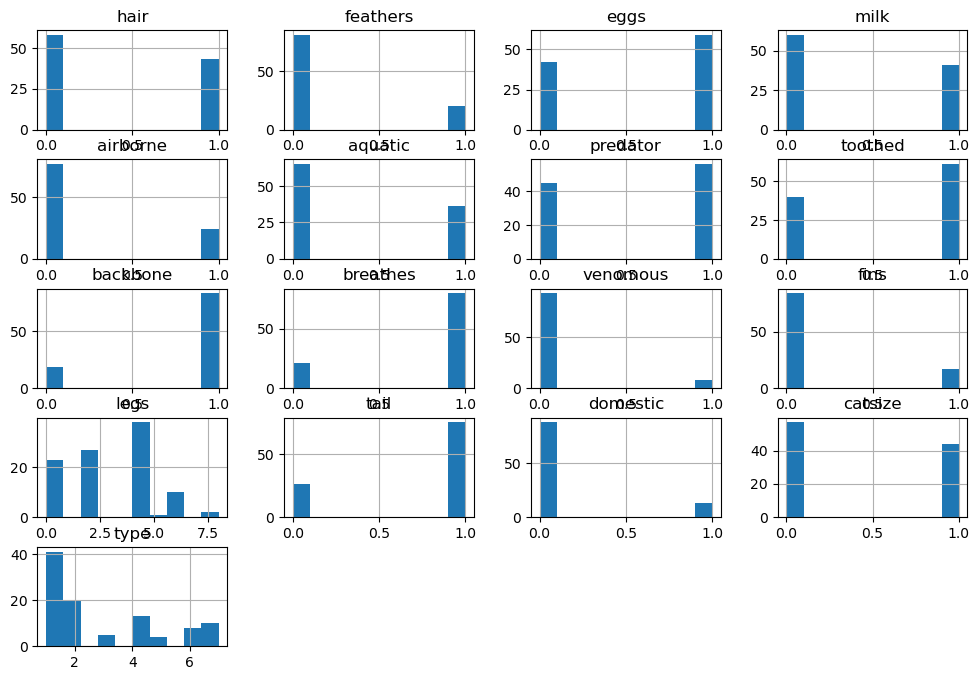

In [21]:
zoo.hist(figsize=(12, 8))
plt.show()


In [23]:
zoo.fillna(zoo.median(numeric_only=True), inplace=True)


In [25]:
label_encoders = {}
for col in zoo.select_dtypes(include=['object']).columns:
    if col != 'Animal_Type':  # Exclude target variable
        le = LabelEncoder()
        zoo[col] = le.fit_transform(zoo[col])
        label_encoders[col] = le

In [29]:
X = zoo.drop(columns=['type'])
y = zoo['type']

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
error_rates = []
k_range = range(1, 21)


In [37]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    error_rates.append(np.mean(y_pred_k != y_test))

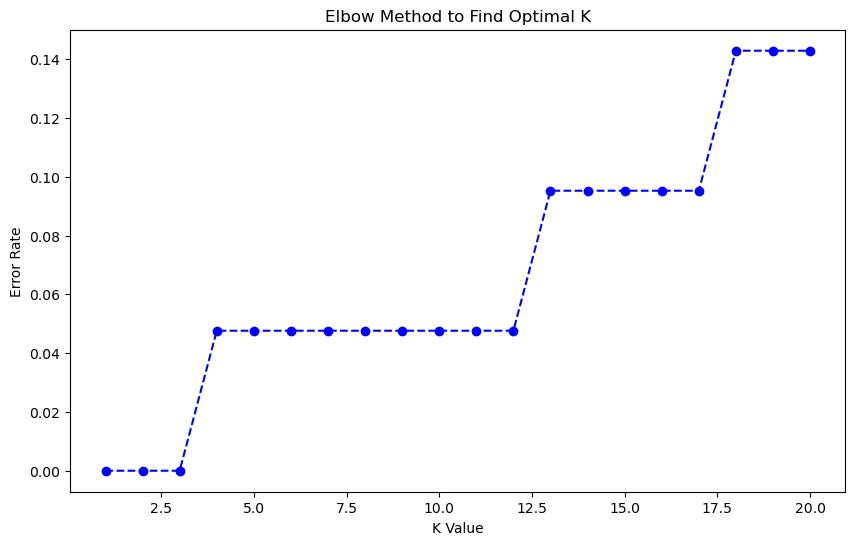

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='dashed', color='b')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method to Find Optimal K")
plt.show()

In [41]:
optimal_k = k_range[np.argmin(error_rates)]
print(f"Optimal K: {optimal_k}")


Optimal K: 1


In [43]:
knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [45]:
y_pred = knn.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



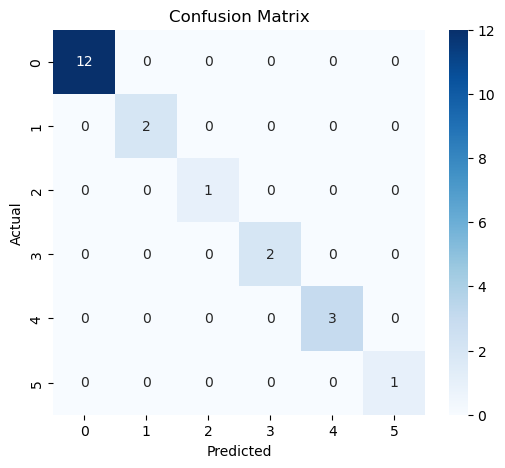

In [47]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [51]:
if X.shape[1] == 2:  
    from matplotlib.colors import ListedColormap
    X_set, y_set = X_train, y_train
    X1, X2 = np.meshgrid(
        np.arange(X_set[:, 0].min() - 1, X_set[:, 0].max() + 1, 0.01),
        np.arange(X_set[:, 1].min() - 1, X_set[:, 1].max() + 1, 0.01)
    )

    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'blue', 'green')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, edgecolor='black', cmap=ListedColormap(('red', 'blue', 'green')))
    plt.title(f"KNN Decision Boundary (K={optimal_k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


1. What are the key hyperparameters in KNN?

K (Number of Neighbors): Determines how many neighbors influence the classification.
Distance Metric: Defines how similarity is measured (Euclidean, Manhattan, Minkowski).
Weighting Function: Determines if all neighbors contribute equally or based on distance (uniform vs. distance).

2. What distance metrics can be used in KNN?

Euclidean Distance: Most common, calculates straight-line distance.
Manhattan Distance: Uses absolute differences.
Minkowski Distance: Generalized form (Euclidean when p=2, Manhattan when p=1).
Hamming Distance: Used for categorical data.
Cosine Similarity: Measures angle between vectors.